# Exploratory Data Analysis Pt.2
## Define Libraries

In [2]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Getting rid of the SettingWithCopyWarning: 
pd.options.mode.chained_assignment = None

## Upload Data

In [3]:
# Set working directory
path = '/Users/mau/Library/CloudStorage/Dropbox/Mac/Documents/Dissertation/Chapter 2/Data'
os.chdir(path)

# Load data into a DataFrame
dtf = pd.read_parquet("dtf_with_change_col.parquet")

print(dtf.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 89996 entries, 0 to 90273
Data columns (total 42 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   starteventdatetime            89996 non-null  object 
 1   endeventdatetime              89996 non-null  object 
 2   playercashableamt             89996 non-null  float64
 3   wageredamt                    89996 non-null  float64
 4   casino_grosswin               89996 non-null  float64
 5   playerkey                     89996 non-null  int64  
 6   age                           89996 non-null  int64  
 7   maxbet                        89996 non-null  int64  
 8   assetnumber                   89996 non-null  int64  
 9   theoreticalwin                89996 non-null  float64
 10  theoreticalpaybackpercent     89996 non-null  float64
 11  player_loss                   89996 non-null  float64
 12  player_wins                   89996 non-null  float64
 13  p

In [4]:
# What is the maximum number of periods played by each player?
print("Maximimum # of gambles:", dtf.groupby('playerkey')['gambles'].max().max())

#Who is the player with the maximum number of periods played?
print("Player who gambled the most:", dtf.groupby('playerkey')['gambles'].max().idxmax())

# What is the minimum number of periods played by each player?
print("Minimum # of gambles:", dtf.groupby('playerkey')['gambles'].max().min())

#Who is the player with the minimum number of periods played?
print("Player who gambled the least:", dtf.groupby('playerkey')['gambles'].max().idxmin())

# What is the average number of periods played by each player?
print("Median # of gambles:", round(dtf.groupby('playerkey')['gambles'].max().median(), 2))

Maximimum # of gambles: 8470
Player who gambled the most: 33
Minimum # of gambles: 49
Player who gambled the least: 10
Median # of gambles: 371.0


In [5]:
from ipynb.fs.full.functions import len_players_inc_losing, apply_func_to_chunks, mangnitude_of_loses, average, create_dtf_dic, mangnitude_of_wins

In [6]:
# Let's see the main periods were players increased their slotdeno while losing 2 previous periods
print('After losing 2 periods:')
results_slotdeno_2, rank_results_inc_lossing = apply_func_to_chunks(dtf, 40, len_players_inc_losing, column="increase_slotdeno", n_periods=2)
print("Top 5 results inc denomination:", rank_results_inc_lossing[:5])

# Let's see the main periods were players changed machines while losing 2 previous periods
results_machine_2, rank_results_change_machine_lossing = apply_func_to_chunks(dtf, 40, len_players_inc_losing, column="change_machine", n_periods=2)
print("Top 5 results machine change:", rank_results_change_machine_lossing[:5])

# Let's see the main periods were players increased max bet while losing 2 previous periods
results_maxbet_2, rank_results_inc_bet_lossing = apply_func_to_chunks(dtf, 40, len_players_inc_losing, column="increase_maxbet", n_periods=2)
print("Top 5 results in maxbet:", rank_results_inc_bet_lossing[:5])
print('------------------------------------------------------')

# Let's see the main periods were players increased their slotdeno while losing 3 previous periods
print('After losing 3 periods:')
results_slotdeno_3, rank_results_inc_lossing = apply_func_to_chunks(dtf, 40, len_players_inc_losing, column="increase_slotdeno", n_periods=3)
print("Top 5 results inc denomination:", rank_results_inc_lossing[:5])

# Let's see the main periods were players changed machines while losing 3 previous periods
results_machine_3, rank_results_change_machine_lossing = apply_func_to_chunks(dtf, 40, len_players_inc_losing, column="change_machine", n_periods=3)
print("Top 5 results machine change:", rank_results_change_machine_lossing[:5])

# Let's see the main periods were players increased max bet while losing 3 previous periods
results_maxbet_3, rank_results_inc_bet_lossing = apply_func_to_chunks(dtf, 40, len_players_inc_losing, column="increase_maxbet", n_periods=3)
print("Top 5 results in maxbet:", rank_results_inc_bet_lossing[:5])
print('------------------------------------------------------')

# Let's see the main periods were players increased their slotdeno while losing 4 previous periods
print('After losing 4 periods:')
results_slotdeno_4, rank_results_inc_lossing = apply_func_to_chunks(dtf, 40, len_players_inc_losing, column="increase_slotdeno", n_periods=4)
print("Top 5 results inc denomination:", rank_results_inc_lossing[:5])

# Let's see the main periods were players changed machines while losing 4 previous periods
results_machine_4, rank_results_change_machine_lossing = apply_func_to_chunks(dtf, 40, len_players_inc_losing, column="change_machine", n_periods=4)
print("Top 5 results machine change:", rank_results_change_machine_lossing[:5])

# Let's see the main periods were players increased max bet while losing 4 previous periods
results_maxbet_4, rank_results_inc_bet_lossing = apply_func_to_chunks(dtf, 40, len_players_inc_losing, column="increase_maxbet", n_periods=4)
print("Top 5 results in maxbet:", rank_results_inc_bet_lossing[:5])
print('------------------------------------------------------')

After losing 2 periods:
Top 5 results inc denomination: [('41-80', 10), ('1-40', 9), ('121-160', 8), ('81-120', 4), ('201-240', 4)]
Top 5 results machine change: [('41-80', 26), ('1-40', 23), ('121-160', 18), ('241-280', 16), ('201-240', 15)]
Top 5 results in maxbet: [('41-80', 16), ('1-40', 9), ('81-120', 6), ('121-160', 6), ('201-240', 6)]
------------------------------------------------------
After losing 3 periods:
Top 5 results inc denomination: [('41-80', 10), ('1-40', 8), ('121-160', 6), ('81-120', 4), ('241-280', 4)]
Top 5 results machine change: [('41-80', 26), ('1-40', 21), ('121-160', 15), ('201-240', 14), ('161-200', 13)]
Top 5 results in maxbet: [('41-80', 15), ('1-40', 7), ('81-120', 6), ('201-240', 6), ('241-280', 6)]
------------------------------------------------------
After losing 4 periods:
Top 5 results inc denomination: [('41-80', 9), ('1-40', 8), ('121-160', 5), ('81-120', 4), ('281-320', 4)]
Top 5 results machine change: [('41-80', 26), ('1-40', 19), ('121-160',

In [14]:
results_magnitude, rank_mangnitude_of_loses = apply_func_to_chunks(dtf, 40, mangnitude_of_loses, column="percent_return")

print("Magnitude of loses:", results_magnitude)
print("Top 5 results in magnitude:", rank_mangnitude_of_loses[:5])
print("Bottom 5 results in magnitude:", rank_mangnitude_of_loses[-5:])
print('----------------------------------------------------------------')

results_magnitude_wins, rank_mangnitude_of_wins = apply_func_to_chunks(dtf, 40, mangnitude_of_wins, column="percent_return")

print("Magnitude of wins:", results_magnitude_wins)
print("Top 5 results in magnitude:", rank_mangnitude_of_wins[:5])
print("Bottom 5 results in magnitude:", rank_mangnitude_of_wins[-5:])
print('----------------------------------------------------------------')

results_payback, rank_payback = apply_func_to_chunks(dtf, 40, average, column="theoreticalpaybackpercent")
print("Average payback:", results_payback)
print("Top 5 results in payback:", rank_payback[:5])
print("Bottom 5 results in payback:", rank_payback[-5:])
print('----------------------------------------------------------------')

results_theowin, rank_theowin = apply_func_to_chunks(dtf, 40, average, column="theoreticalwin")
print("Average theowin:", results_theowin)
print("Top 5 results in theowin:", rank_theowin[:5])
print("Bottom 5 results in theowin:", rank_theowin[-5:])
print('----------------------------------------------------------------')

results_maxbet, rank_maxbet = apply_func_to_chunks(dtf, 40, average, column="maxbet")
print("Average maxbet:", results_maxbet)
print("Top 5 results in maxbet:", rank_maxbet[:5])
print("Bottom 5 results in maxbet:", rank_maxbet[-5:])
print('----------------------------------------------------------------')

results_slotdenomination, rank_slotdenomination = apply_func_to_chunks(dtf, 40, average, column="slotdenomination")
print("Average slotdenomination:", results_slotdenomination)
print("Top 5 results in slotdenomination:", rank_slotdenomination[:5])
print("Bottom 5 results in slotdenomination:", rank_slotdenomination[-5:])
print('----------------------------------------------------------------')

# # Calulate statistics for the magnitude of loses
# print("Mean magnitude of loses:", round(sum(results_magnitude.values())/len(results_magnitude), 2))
# print("Median magnitude of loses:", round(sorted(results_magnitude.values())[len(results_magnitude)//2], 2))
# print("Standard deviation of magnitude of loses:", round(pd.Series(results_magnitude.values()).std(), 2))


Magnitude of loses: {'1-40': 90.35, '41-80': 90.34, '81-120': 89.62, '121-160': 89.97, '161-200': 89.39, '201-240': 88.79, '241-280': 89.05, '281-320': 89.68, '321-360': 88.17, '361-400': 87.51, '401-440': 88.62, '441-480': 89.44, '481-520': 89.32, '521-560': 87.82, '561-600': 89.16, '601-640': 90.26, '641-680': 88.03, '681-720': 89.67, '721-760': 88.75, '761-800': 88.26, '801-840': 86.76, '841-880': 86.87, '881-920': 85.73, '921-960': 87.7, '961-1000': 88.71, '1001-1040': 88.45, '1041-1080': 89.48, '1081-1120': 89.56, '1121-1160': 87.21, '1161-1200': 86.83, '1201-1240': 89.28, '1241-1280': 88.71, '1281-1320': 91.07, '1321-1360': 89.09, '1361-1400': 87.74, '1401-1440': 89.77, '1441-1480': 88.24, '1481-1520': 88.42, '1521-1560': 88.67, '1561-1600': 90.97, '1601-1640': 91.4, '1641-1680': 91.49, '1681-1720': 91.47, '1721-1760': 90.4, '1761-1800': 88.24, '1801-1840': 88.97, '1841-1880': 89.66, '1881-1920': 90.17, '1921-1960': 92.32, '1961-2000': 91.1, '2001-2040': 90.6, '2041-2080': 90.29,

In [15]:
# Create a DataFrame with the results
dtf1 = create_dtf_dic(results_magnitude, 'magnitude_loss', 'chunk_size')
dtf2 = create_dtf_dic(results_magnitude_wins, 'magnitude_win', 'chunk_size')
dtf3 = create_dtf_dic(results_payback, 'ave_theo_payback', 'chunk_size')
dtf4 = create_dtf_dic(results_maxbet, 'ave_maxbet', 'chunk_size')
dtf5 = create_dtf_dic(results_slotdenomination, 'ave_slotdeno', 'chunk_size')
dtf6 = create_dtf_dic(results_maxbet_2, 'maxbet_2', 'chunk_size')
dtf7 = create_dtf_dic(results_maxbet_3, 'maxbet_3', 'chunk_size')
dtf8 = create_dtf_dic(results_maxbet_4, 'maxbet_4', 'chunk_size')
dtf9 = create_dtf_dic(results_slotdeno_2, 'slotdeno_2', 'chunk_size')
dtf10 = create_dtf_dic(results_slotdeno_3, 'slotdeno_3', 'chunk_size')
dtf11 = create_dtf_dic(results_slotdeno_4, 'slotdeno_4', 'chunk_size')
dtf12 = create_dtf_dic(results_machine_2, 'machine_2', 'chunk_size')
dtf13 = create_dtf_dic(results_machine_3, 'machine_3', 'chunk_size')
dtf14 = create_dtf_dic(results_machine_4, 'machine_4', 'chunk_size')
dtf15 = create_dtf_dic(results_theowin, 'ave_theowin', 'chunk_size')

from functools import reduce

dfs = [dtf1, dtf2, dtf3, dtf4, dtf5, dtf6, dtf7, dtf8, dtf9, dtf10, dtf11, dtf12, dtf13, dtf14, dtf15]
dtfs = reduce(lambda left,right: pd.merge(left,right,on='chunk_size'), dfs)




# Print haed of the DataFrame
print(dtfs.head(3))

print(dtfs.info())

  chunk_size  magnitude_loss  magnitude_win  ave_theo_payback  ave_maxbet  \
0       1-40           90.35         384.96             89.58      224.49   
1      41-80           90.34         317.65             90.17      206.65   
2     81-120           89.62         428.99             90.31      255.99   

   ave_slotdeno  maxbet_2  maxbet_3  maxbet_4  slotdeno_2  slotdeno_3  \
0          0.86         9         7         6           9           8   
1          0.85        16        15        15          10          10   
2          0.64         6         6         5           4           4   

   slotdeno_4  machine_2  machine_3  machine_4  ave_theowin  
0           8         23         21         19         0.56  
1           9         26         26         26         0.33  
2           4         13         12         11         0.46  
<class 'pandas.core.frame.DataFrame'>
Int64Index: 212 entries, 0 to 211
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 

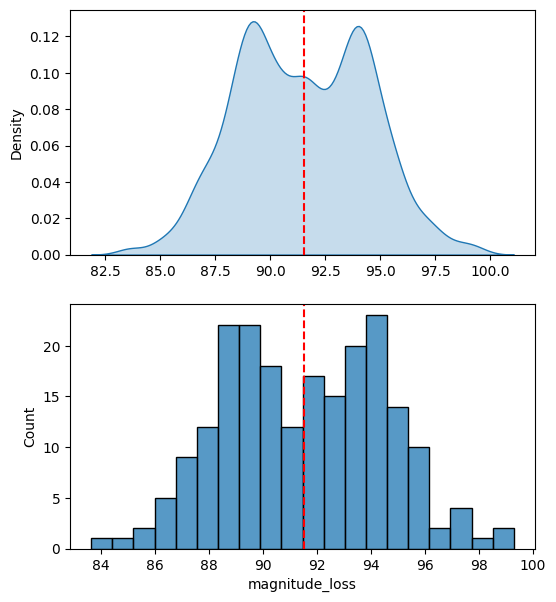

In [18]:
# Create figure 2
fig2, axes2 = plt.subplots(2, 1)
sns.kdeplot(dtfs['magnitude_loss'], fill=True, ax=axes2[0], bw_method=0.2)
# add a vertical line at the mean
axes2[0].axvline(dtfs['magnitude_loss'].mean(), color='r', linestyle='--')
# Remove Label
axes2[0].set(xlabel=None)
# Add a histogram on axes2[1]
sns.histplot(dtfs['magnitude_loss'], ax=axes2[1], bins=20)
# add a vertical line at the mean
axes2[1].axvline(dtfs['magnitude_loss'].mean(), color='r', linestyle='--')

# Make figure bigger
fig2.set_size_inches(6, 7)

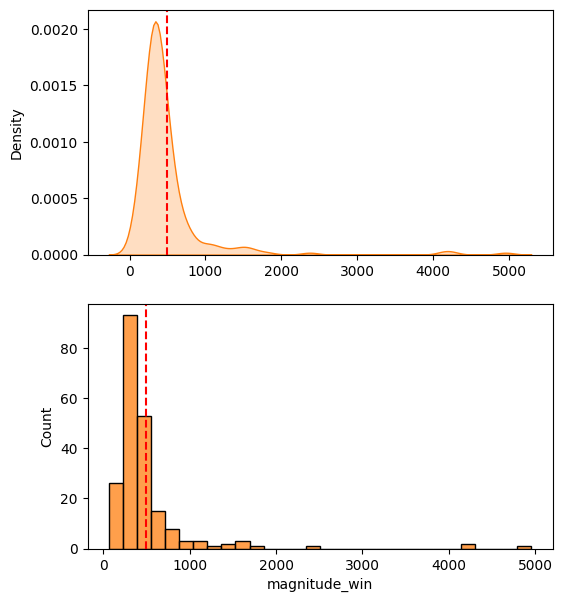

In [19]:
# Create figure 3 with maginitude of wins and color='#ff7f0e'
fig3, axes3 = plt.subplots(2, 1)
sns.kdeplot(dtfs['magnitude_win'], fill=True, ax=axes3[0], bw_method=0.2, color='#ff7f0e')
# add a vertical line at the mean
axes3[0].axvline(dtfs['magnitude_win'].mean(), color='r', linestyle='--')
# Remove Label
axes3[0].set(xlabel=None)
# Add a histogram on axes2[1]
sns.histplot(dtfs['magnitude_win'], ax=axes3[1], bins=30, color='#ff7f0e')
# add vertical line at the mean
axes3[1].axvline(dtfs['magnitude_win'].mean(), color='r', linestyle='--')
# Make figure bigger
fig3.set_size_inches(6, 7)

                  magnitude_loss  magnitude_win  ave_theo_payback  ave_maxbet  \
magnitude_loss          1.000000       0.105849         -0.255237   -0.416622   
magnitude_win           0.105849       1.000000          0.036370    0.210846   
ave_theo_payback       -0.255237       0.036370          1.000000    0.129715   
ave_maxbet             -0.416622       0.210846          0.129715    1.000000   
ave_slotdeno           -0.187970      -0.082398          0.430058   -0.026314   
maxbet_2               -0.236532      -0.049229          0.231677    0.127686   
maxbet_3               -0.231781      -0.043405          0.230893    0.140568   
maxbet_4               -0.207649      -0.041367          0.223036    0.124110   
slotdeno_2             -0.321359      -0.073624          0.376411    0.230107   
slotdeno_3             -0.314786      -0.070515          0.371504    0.231596   
slotdeno_4             -0.313197      -0.072579          0.367833    0.232874   
machine_2              -0.28

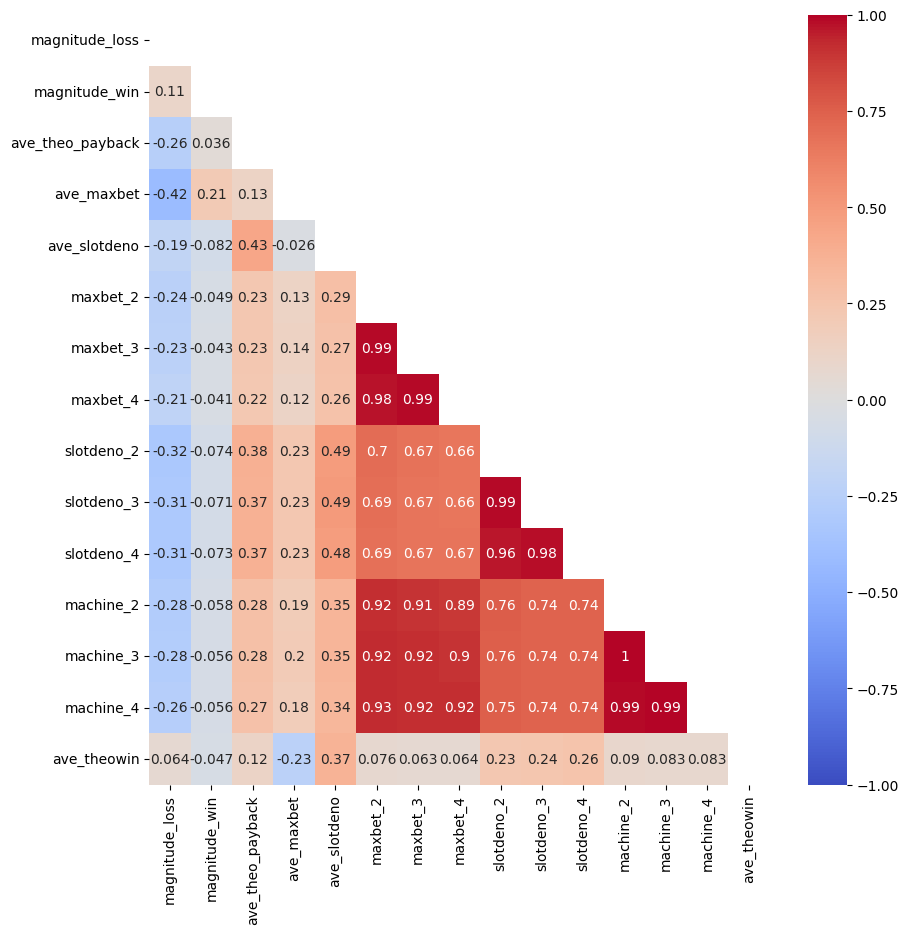

In [20]:
import numpy as np

correlation_matrix = dtfs.corr(numeric_only=True)
print(correlation_matrix)

# Create figure 5 that is the heatmap of the correlation matrix
fig5, axes5 = plt.subplots(1, 1)
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(correlation_matrix))
# plot the heatmap
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
# Make figure bigger
fig5.set_size_inches(10, 10)

                  magnitude_loss
magnitude_loss          1.000000
magnitude_win           0.105849
ave_theowin             0.064006
ave_slotdeno           -0.187970
maxbet_4               -0.207649
maxbet_3               -0.231781
maxbet_2               -0.236532
ave_theo_payback       -0.255237
machine_4              -0.260303
machine_3              -0.278898
machine_2              -0.281290
slotdeno_4             -0.313197
slotdeno_3             -0.314786
slotdeno_2             -0.321359
ave_maxbet             -0.416622


<Axes: >

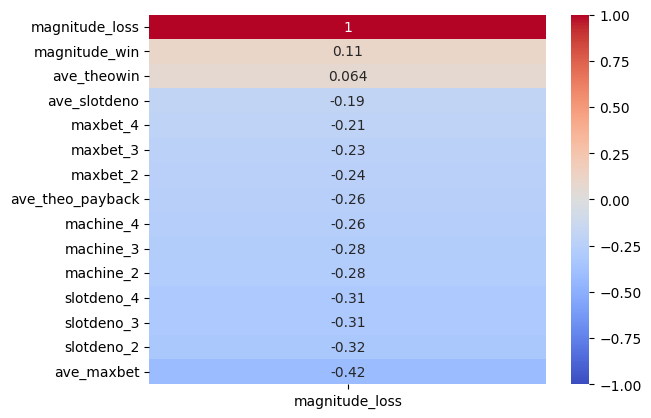

In [21]:
loss_correlation = dtfs.corr(numeric_only=True)[['magnitude_loss']].sort_values(by='magnitude_loss', ascending=False)

print(loss_correlation)
# Create figure 6 that is the heatmap of the correlation matrix
fig6, axes6 = plt.subplots(1, 1)

# plot the heatmap
sns.heatmap(loss_correlation, annot=True, cmap='coolwarm', vmin=-1, vmax=1)

# This split is based on the average number of gambles in the sample (1084).

* _early_: 1 to 280
* _middle_: 281 to 560
* _late_: 561 to 840
* _very late_: 841 to 1120

In [22]:
# Slice data frame to include only rows from index 0 to 27
dtfs_2 = dtfs.iloc[0:28, :]
# Create categorial column named 'timing' with four categories 'early', 'middle', 'late', 'very late'
dtfs_2['timing'] = pd.cut(dtfs_2.index, bins=[-1, 6, 13, 20, 27], labels=['early', 'middle', 'late', 'very late'])

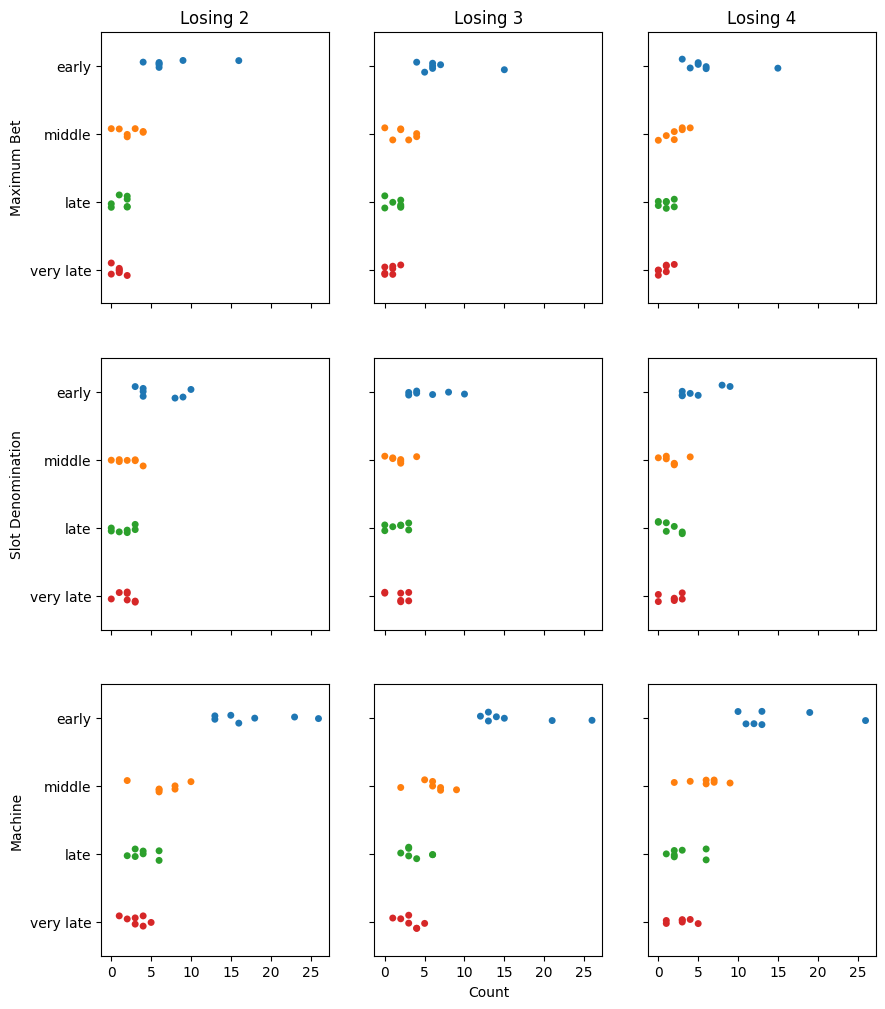

In [23]:
# Create  figure 10
fig10, axes10 = plt.subplots(3, 3, sharex=True, sharey=True)

# Create barplot maxbet_2 vs timing
sns.stripplot(y='timing', x='maxbet_2', data=dtfs_2, hue='timing', ax=axes10[0,0], legend=False)
axes10[0,0].set(xlabel=None)
axes10[0,0].set(ylabel='Maximum Bet')
# set title of subplot
axes10[0,0].set_title('Losing 2')

# Create barplot slotdeno_2 vs timing
sns.stripplot(y='timing', x='slotdeno_2', data=dtfs_2, hue='timing', ax=axes10[1,0], legend=False)
axes10[1,0].set(xlabel=None)
axes10[1,0].set(ylabel='Slot Denomination')

# Create barplot machine_2 vs timing
sns.stripplot(y='timing', x='machine_2', data=dtfs_2, hue='timing', ax=axes10[2,0], legend=False)
axes10[2,0].set(xlabel=None)
axes10[2,0].set(ylabel='Machine')

# Create barplot maxbet_3 vs timing
sns.stripplot(y='timing', x='maxbet_3', data=dtfs_2, hue='timing', ax=axes10[0,1], legend=False)
axes10[0,1].set(xlabel=None)
axes10[0,1].set(ylabel=None)
# set title of subplot
axes10[0,1].set_title('Losing 3')

# Create barplot slotdeno_3 vs timing
sns.stripplot(y='timing', x='slotdeno_3', data=dtfs_2, hue='timing', ax=axes10[1,1], legend=False)
axes10[1,1].set(xlabel=None)
axes10[1,1].set(ylabel=None)

# Create barplot machine_3 vs timing
sns.stripplot(y='timing', x='machine_3', data=dtfs_2, hue='timing', ax=axes10[2,1], legend=False)
axes10[2,1].set(xlabel='Count')
axes10[2,1].set(ylabel=None)

# Create barplot maxbet_4 vs timing
sns.stripplot(y='timing', x='maxbet_4', data=dtfs_2, hue='timing', ax=axes10[0,2], legend=False)
axes10[0,2].set(xlabel=None)
axes10[0,2].set(ylabel=None)
# set title of subplot
axes10[0,2].set_title('Losing 4')

# Create barplot slotdeno_4 vs timing
sns.stripplot(y='timing', x='slotdeno_4', data=dtfs_2, hue='timing', ax=axes10[1,2], legend=False)
axes10[1,2].set(xlabel=None)
axes10[1,2].set(ylabel=None)

# Create barplot machine_4 vs timing
sns.stripplot(y='timing', x='machine_4', data=dtfs_2, hue='timing', ax=axes10[2,2], legend=False)
axes10[2,2].set(xlabel=None)
axes10[2,2].set(ylabel=None)

# Make increments of 5 on x-axis on all axes
axes10[2,0].set_xticks(np.arange(0, 30, 5))
# Make figure bigger
fig10.set_size_inches(10, 12)



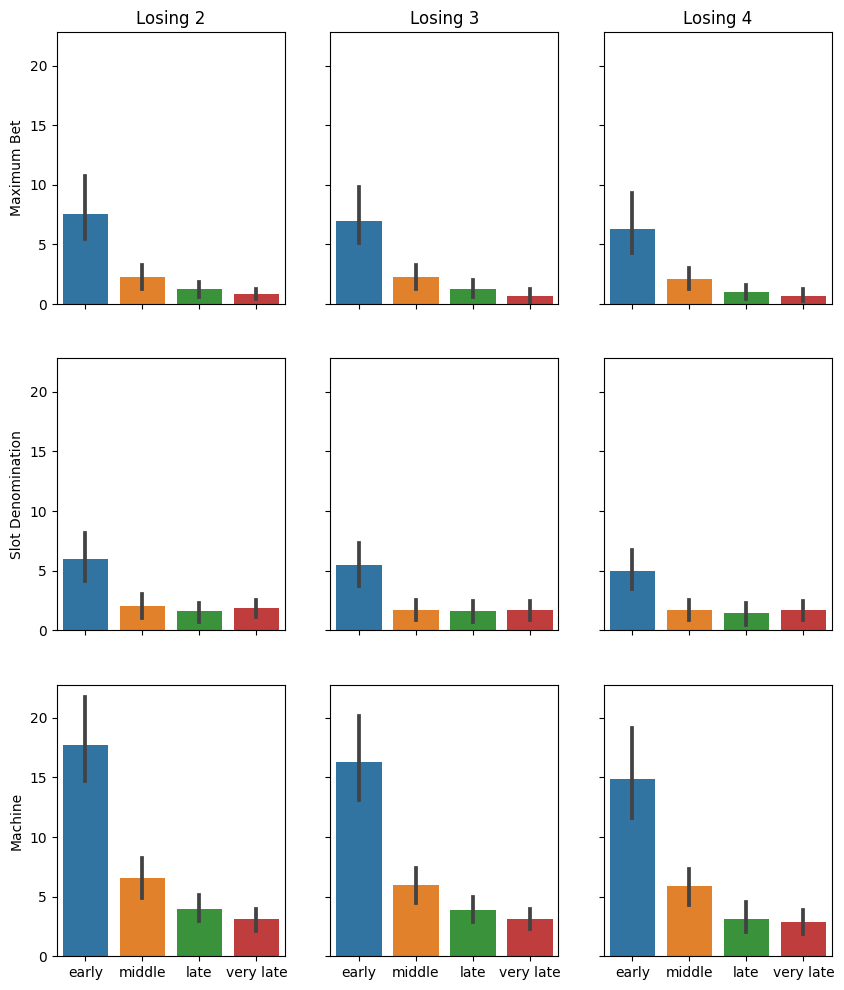

In [24]:
# Create figure 11
fig11, axes11 = plt.subplots(3, 3, sharex=True, sharey=True)

# Create barplot maxbet_2 vs timing
sns.barplot(x='timing', y='maxbet_2', data=dtfs_2, ax=axes11[0,0])
axes11[0,0].set(ylabel='Maximum Bet')
axes11[0,0].set(xlabel=None)
# set title of subplot
axes11[0,0].set_title('Losing 2')

# Create barplot slotdeno_2 vs timing
sns.barplot(x='timing', y='slotdeno_2', data=dtfs_2, ax=axes11[1,0])
axes11[1,0].set(ylabel='Slot Denomination')
axes11[1,0].set(xlabel=None)

# Create barplot machine_2 vs timing
sns.barplot(x='timing', y='machine_2', data=dtfs_2, ax=axes11[2,0])
axes11[2,0].set(ylabel='Machine')
axes11[2,0].set(xlabel=None)

# Create barplot maxbet_3 vs timing
sns.barplot(x='timing', y='maxbet_3', data=dtfs_2, ax=axes11[0,1])
axes11[0,1].set(ylabel=None)
axes11[0,1].set(xlabel=None)
# set title of subplot
axes11[0,1].set_title('Losing 3')

# Create barplot slotdeno_3 vs timing
sns.barplot(x='timing', y='slotdeno_3', data=dtfs_2, ax=axes11[1,1])
axes11[1,1].set(ylabel=None)
axes11[1,1].set(xlabel=None)

# Create barplot machine_3 vs timing
sns.barplot(x='timing', y='machine_3', data=dtfs_2, ax=axes11[2,1])
axes11[2,1].set(ylabel=None)
axes11[2,1].set(xlabel=None)

# Create barplot maxbet_4 vs timing
sns.barplot(x='timing', y='maxbet_4', data=dtfs_2, ax=axes11[0,2])
axes11[0,2].set(ylabel=None)
axes11[0,2].set(xlabel=None)
# set title of subplot
axes11[0,2].set_title('Losing 4')

# Create barplot slotdeno_4 vs timing
sns.barplot(x='timing', y='slotdeno_4', data=dtfs_2, ax=axes11[1,2])
axes11[1,2].set(ylabel=None)
axes11[1,2].set(xlabel=None)

# Create barplot machine_4 vs timing
sns.barplot(x='timing', y='machine_4', data=dtfs_2, ax=axes11[2,2])
axes11[2,2].set(ylabel=None)
axes11[2,2].set(xlabel=None)

# Make figure bigger
fig11.set_size_inches(10, 12)